In [1]:
import gym
from keras.optimizers import Adam

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import base
from src.agents import DoubleDeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_space_invaders

# Environment

In [3]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('SpaceInvadersDeterministic-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
agent = DoubleDeepQAgent(env, downsample_space_invaders,
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-4),
    render_mode='rgb_array'
)
agent

DoubleDeepQAgent(
    env=<TimeLimit<AtariEnv<SpaceInvadersDeterministic-v4>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2ba4e9527358>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2ba4fcc791e0>,
    image_size=(84, 84),
    render_mode='rgb_array',
    target_update_freq=10000
)

In [7]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [01:04<00:00,  2.16s/game]


array([11., 21., 14.,  8., 19., 11., 15., 10., 11., 11., 22., 20.,  5.,
        8., 12., 20.,  7.,  7., 20.,  9., 11., 17., 19.,  6., 14., 15.,
        7.,  4., 20.,  7.])

In [8]:
res_random.mean()

12.7

In [ ]:
agent.observe(50000)

100%|██████████| 50000/50000 [00:39<00:00, 1251.61frame/s]


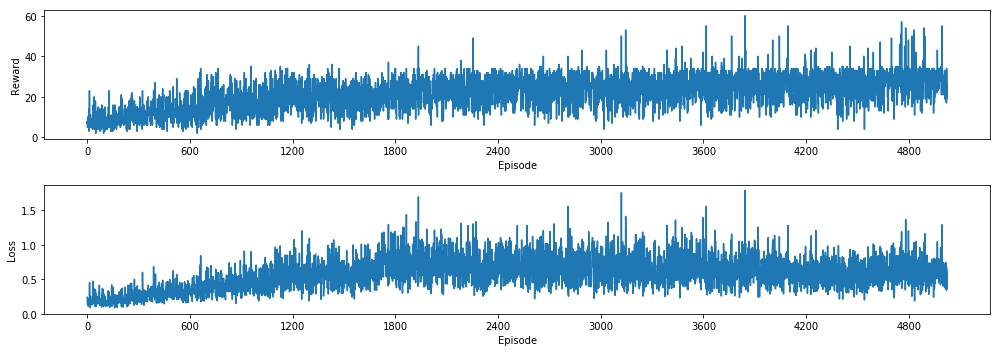

 88%|████████▊ | 4382546/5000000 [6:28:48<54:54, 187.43frame/s]

In [ ]:
callback = JupyterCallback()
agent.train(frames_to_play=5000000, callback=callback)

In [15]:
res_trained = agent.play(games=30)
res_trained

100%|██████████| 30/30 [01:04<00:00,  2.17s/game]


array([27., 24., 34., 23., 28., 28., 29., 34., 15., 32., 27., 19., 38.,
       15., 21., 18., 21., 27., 33., 11., 18., 30., 24., 33., 25., 33.,
       30., 30., 49., 26.])

In [16]:
res_trained.mean()

26.733333333333334

In [17]:
!mkdir -p models
!mkdir -p models/double_dqn

In [18]:
agent.model.save_weights('./models/double_dqn/space_invaders.h5', overwrite=True)